# Stage2 機械学習Report 
##### (線形回帰モデル/非線形回帰モデル/ロジスティック回帰モデル/主成分分析/アルゴリズム/サポートベクターマシーン)

## 回帰問題
### 入力（離散または連続値）から出力を予測する問題
#### 　線形で予測　------> 　線形回帰モデル
#### 非線形で予測　------> 非線形回帰モデル
#### 
#### 回帰で扱うデータ
##### 入力(説明変数または特徴量）

#### &emsp;&emsp; $ x= (x_1 , x_2 , \cdots ,x_m )^ \mathrm{T} \in  \mathbb{R}^m  $ 

#### 出力(目的変数）

#### &emsp;&emsp; $ y \in \mathbb{R}^1  $ 

## 1.線形回帰モデル

#### 教師あり学習
#### 入力とm次元パラメータの線形結合を出力するモデル

##### パラメータ　$ \boldsymbol{w} = (w_1,w_2, \cdots , w_m )^ \mathrm{T} )\in  \mathbb{R}^m $

##### 線形結合　$ \hat{y} = w^ \mathrm{T} x + w_0 =\sum _{j=1} ^{m} {w_jx_j} + w_0 $

#####  (モデルの出力値ベクトル)=(学習データの説明変数行列)×(回帰係数ベクトル)+(切片ベクトル)

In [ ]:
パラメータの更新方法：最小二乗法によって算出。


#### 線形結合とは、入力とパラメータの内積である。
###### $w $ パラメータ--->　重み(weight ), 切片(バイアス)を加えたもの。
###### 重みは正の値をつけると、特徴量を増加させる。負の値をつけると現象させる。
###### 大きい値だと影響力を増すことになる。
###### 入力ベクトルが多次元でも出力は一次元（スカラ）になる。

In [ ]:
###### パラメータの更新方法：最小二乗法によって算出。
###### 

## 線形回帰モデル　ハンズオン

In [12]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()
#インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [15]:
#DESCR変数の中身を確認

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
###### 補足
# CRIM    : 町別の一人当たりの犯罪率 
# ZN      : 25,000平方フィートを超える区画にゾーニングされた住宅用地の割合。 
# INDUS   : 町ごとの非小売業のエーカーの割合 
# CHAS    : チャールズ川ダミー変数 (= 1 路が川に接する場合 ; 0 それ以外)
# NOX     : 一酸化窒素濃度 (ppm)
# RM      : 住居あたりの平均部屋数
# AGE     : 1940年より前に建てられた持ち家の割合
# DIS     : 5つのボストン雇用センターまでの加重距離 
# RAD     : 放射状高速道路へのアクセシビリティの指標 
# TAX     : 10,000ドルあたりの全額固定資産税率 
# PTRATIO : 町別の生徒と教師の比率 
# B       : 1000（Bk-0.63）^ 2ここで、Bkは町ごとの黒人の割合です 
# LSTAT   : 人口の％低いステータス 
# MEDV    : 1000ドルの持ち家の中央値 

In [16]:
#feature_names変数の中身を確認
#カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
#data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
#target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 2. データフレームの作成

In [23]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 線形単回帰分析

In [24]:
#カラムを指定してデータを表示
df[['RM']].head()
# 説明変数
data = df.loc[:, ['RM']].values
#dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [25]:
# 目的変数
target = df.loc[:, 'PRICE'].values
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [26]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression()

In [27]:
#予測
model.predict([[1]])

array([-25.5685118])

### 重回帰分析(2変数)

In [28]:
#カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [29]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values
#オブジェクト生成
model2 = LinearRegression()
# fit関数でパラメータ推定
model2.fit(data2, target2)
model2.predict([[0.2, 7]])

array([29.43977562])

### 回帰係数と切片の値を確認

In [30]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [31]:
# 重回帰の回帰係数と切片を出力
print(model.coef_)
print(model.intercept_)

[9.10210898]
-34.67062077643857


### モデルの検証
#### 1. 決定係数

In [32]:
#### 決定係数
print('単回帰決定係数: %.3f, 重回帰決定係数 : %.3f' % (model.score(data,target), model2.score(data2,target2)))

単回帰決定係数: 0.484, 重回帰決定係数 : 0.542


In [33]:
# train_test_splitをインポート
from sklearn.model_selection import train_test_split

In [34]:
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(data, target, 
test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

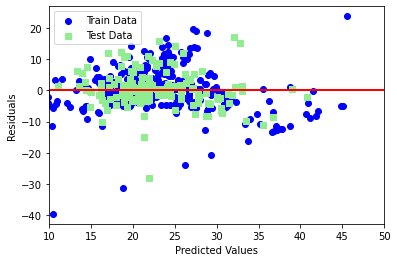

In [46]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

## 2,非線形回帰モデル

### 線形回帰モデル　ハンズオン

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


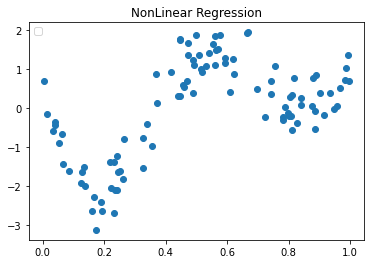

In [50]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

0.2836335716086519


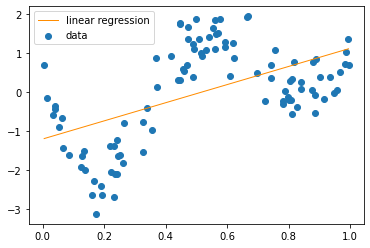

In [51]:
##### 補足（線形回帰モデル）
##### 補足 scikit-learnモデル
##### https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model


from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

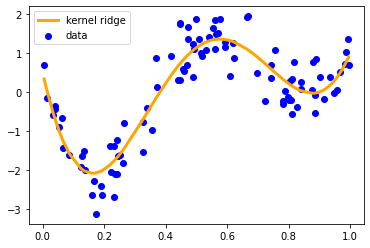

In [52]:
##### 補足(非線形回帰モデル)
####   https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8453652708610857


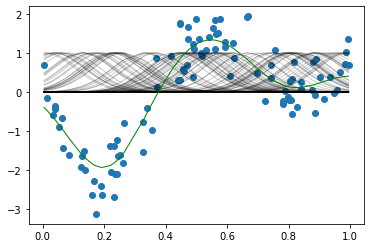

In [54]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

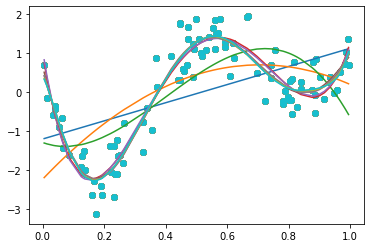

In [56]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

-2.220446049250313e-16


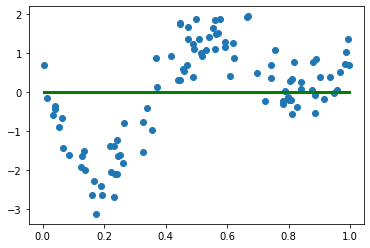

In [57]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


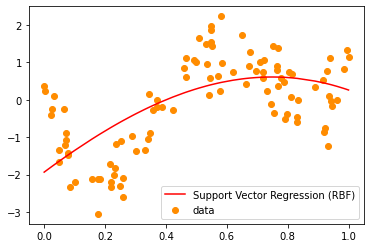

In [12]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [59]:
!pip3 install tensorflow
!pip3 install keras
import keras
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)
cb_cp = ModelCheckpoint('D:\tage2_data\study_ai_ml_google\skl_ml\out\checkpoints\weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='D:\stage2_data\study_ai_ml_google\skl_ml\out\TensorBoard', histogram_freq=0)

In [60]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)
history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

NameError: name 'x_train' is not defined

In [ ]:
y_pred = estimator.predict(x_train)

In [ ]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [ ]:
print(lasso_clf.coef_)

## 3.ロジスティック回帰モデル


### ロジスティック回帰モデル　ハンズオン

In [ ]:
## 0. データ表示

In [29]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [31]:
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)

# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('D:\stage2_data\study_ai_ml_google\data/titanic_train.csv')

In [32]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## 1. ロジスティック回帰
## 不要なデータの削除・欠損値の補完

In [33]:
#予測に不要と考えるからうをドロップ (本当はここの情報もしっかり使うべきだと思っています)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [35]:
#Ageカラムのnullを中央値で補完

titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

#titanic_df.dtypes

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


In [ ]:
## 1. ロジスティック回帰
## 実装(チケット価格から生死を判別)

In [37]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(data1, label1)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
model.predict([[61]])

array([0], dtype=int64)

In [43]:
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [44]:
X_test_value = model.decision_function(data1) 

In [45]:
# # 決定関数値（絶対値が大きいほど識別境界から離れている）
# X_test_value = model.decision_function(X_test) 
# # 決定関数値をシグモイド関数で確率に変換
# X_test_prob = normal_sigmoid(X_test_value) 
print (model.intercept_)
print (model.coef_)

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


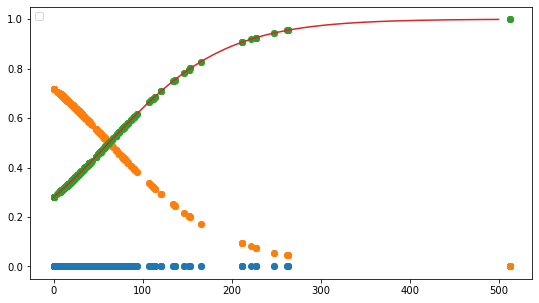

In [46]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
#plt.xkcd()
plt.legend(loc=2)


# plt.ylim(-0.1, 1.1)
# plt.xlim(-10, 10)

# plt.plot([-10,10],[0,0], "k", lw=1)
# plt.plot([0,0],[-1,1.5], "k", lw=1)
plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')
#plt.plot(x_range, normal_sigmoid(x_range), '-')
#




In [48]:
## 1. ロジスティック回帰
## 実装(2変数から生死を判別)
#AgeFillの欠損値を埋めたので
#titanic_df = titanic_df.drop(['Age'], axis=1)
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [51]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [57]:
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'],axis=1)
titanic_df.head()

KeyError: "['Pclass' 'Sex' 'Gender' 'Age'] not found in axis"

In [58]:
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


In [ ]:
# 重要だよ！！！
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# # 境界線 プロット
# plt.plot([-2,2], map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2]))
 
# # データを重ねる
# plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
# plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
# plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

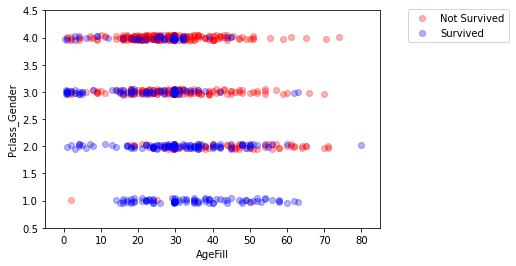

In [59]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [61]:
#運賃だけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [62]:
#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values
model2 = LogisticRegression()
model2.fit(data2, label2)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [63]:
model2.predict([[10,1]])

array([1], dtype=int64)

In [64]:
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

In [65]:
titanic_df.head(3)

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3


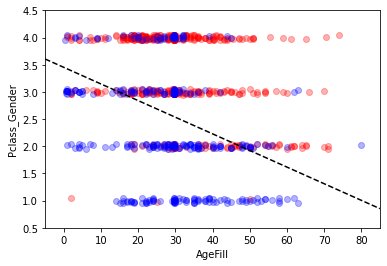

In [66]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

In [109]:
## 2. モデル評価
## 混同行列とクロスバリデーション

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape
trainlabel1.shape

(712, 1)

In [112]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape
trainlabel2.shape
#本来は同じデータセットを分割しなければいけない。(簡易的に別々に分割している。)

(712, 1)

In [113]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
traindata.shape
trainlabel.shape

(712, 1)

In [114]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [115]:
eval_model1.score(traindata1, trainlabel1)

0.6671348314606742

In [116]:
eval_model1.score(testdata1,testlabel1)

0.6480446927374302

In [117]:
eval_model2.score(traindata2, trainlabel2)

0.7780898876404494

In [118]:
eval_model2.score(testdata2,testlabel2)

0.7653631284916201

In [119]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       105
           1       0.76      0.22      0.34        74

    accuracy                           0.65       179
   macro avg       0.70      0.58      0.55       179
weighted avg       0.69      0.65      0.59       179

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       116
           1       0.69      0.60      0.64        63

    accuracy                           0.77       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.76      0.77      0.76       179



In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)
confusion_matrix1

array([[100,   5],
       [ 58,  16]], dtype=int64)

In [121]:
confusion_matrix2

array([[99, 17],
       [25, 38]], dtype=int64)

<AxesSubplot:>

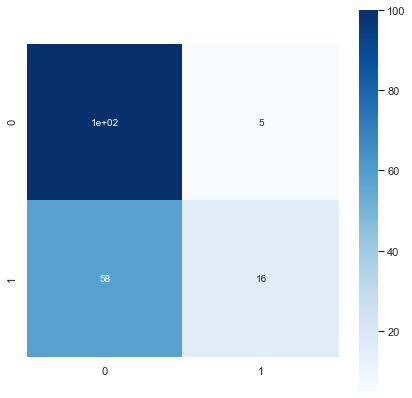

In [122]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

<AxesSubplot:>

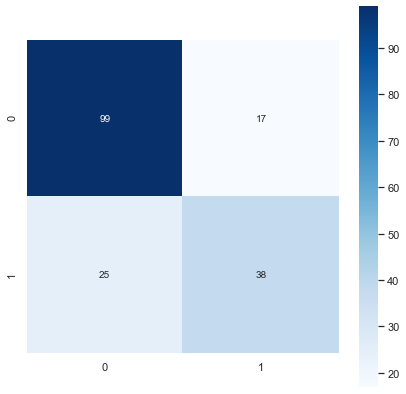

In [123]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


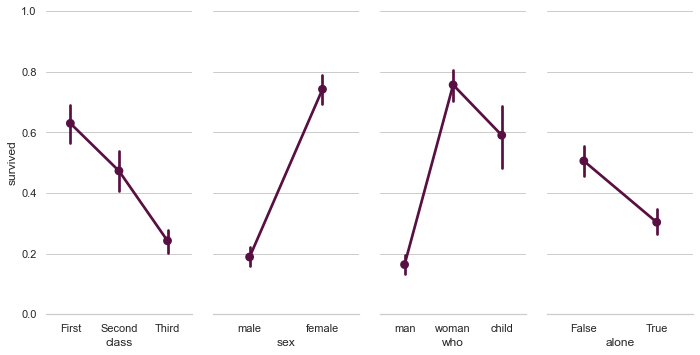

In [124]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

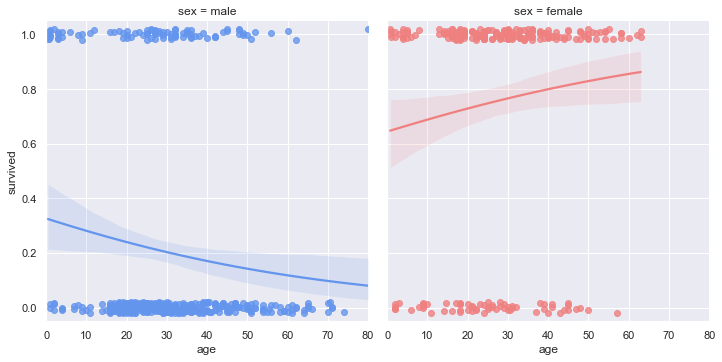

In [125]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

## 4.主成分分析

### 主成分分析　ハンズオン

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
#### 補足　Dドライブ配下にdataを格納(オリジナルからPath変更)
cancer_df = pd.read_csv('D:\stage2_data\study_ai_ml_google\data\cancer.csv')

In [127]:
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [128]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [129]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [130]:
## ・diagnosis: 診断結果 (良性がB / 悪性がM) ・説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [131]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


<BarContainer object of 30 artists>

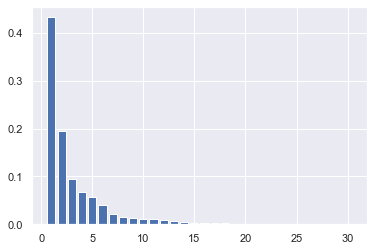

In [132]:
## ・検証スコア97%で分類できることを確認
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

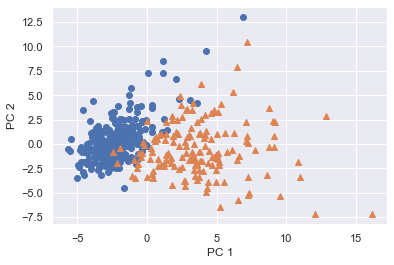

In [133]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

## 5.K近傍法

### K近傍法ハンズオン

In [144]:
!pip3 install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [145]:
wine = datasets.load_wine()

In [146]:
X = wine.data
X.shape

(178, 13)

In [159]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [161]:
df = pd.DataFrame({'labels': labels})
type(df)

TypeError: Set type is unordered

In [162]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [6]:
df['species'] = [species_label(theta) for theta in wine.target]

NameError: name 'wine' is not defined

In [164]:
pd.crosstab(df['labels'], df['species'])

KeyError: 'labels'

## 6.サポートベクターマシーン

### サポートベクターマシーン　ハンドオフ

In [134]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### 訓練データ生成① （線形分離可能）

<ipython-input-137-82254cbe4058>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)


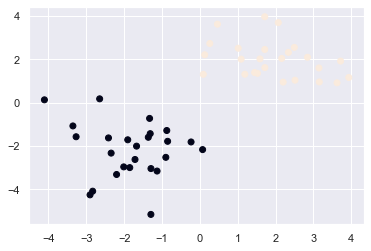

In [137]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

<ipython-input-135-91e32a9b3d43>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)


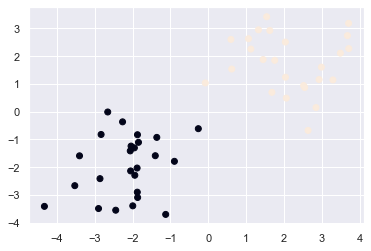

In [ ]:


### 1.1.1行列とは？
#### &emsp;&emsp;スカラ―を表にしたもの。
#### &emsp;&emsp;ベクトルを並べたもの
#### &emsp;&emsp;&emsp;&emsp;→何に使うのか？
#### &emsp;&emsp;&emsp;&emsp;&emsp;1.ベクトルの変換
#### &emsp;&emsp;&emsp;&emsp;&emsp;2.連立方程式を解く
##### &emsp;&emsp; 以下の連立方程式

$$
        \begin{cases}
             &x_1  &+ &2x_2 &= 3 　\\
             &2x_1 &+ &5x_2 &= 5 　\\ 
        \end{cases}
$$

##### &emsp;&emsp; 行列式で表すと以下の式になる。

$$
A\vec{x} = \vec{b}
$$
$$
\left(
    \begin{matrix} 
1 & 2 \\ 2 & 5 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
3 \\ 5 
\end{matrix} 
    \right)  
$$

##### 1.1.2 行列とベクトルの積

$$
\left(
    \begin{matrix} 
6& 4\\ 3& 5 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 \\ 2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
6*1+4*2 \\ 3*1+5*2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
14 \\ 13 
\end{matrix} 
    \right)  
$$

行列の積は、先の行列の"行"と後の行列の"列”の積を和したものになる。

例：

$$
\begin{matrix}
\left[
\begin{array}{ccc}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{array}
\right]
\end{matrix}
\begin{matrix}
\left[
\begin{array}{ccc}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33} \\
\end{array}
\right]
\end{matrix}
=
\begin{matrix}
\left[
\begin{array}{ccc}
a_{11}*b_{11}+a_{12}*b_{21}+ a_{13}*b_{31}& \cdots &  \cdots \\
 \cdots & a_{21}*b_{12}+a_{22}*b_{22}+ a_{23}*b_{32} & \cdots \\
 \cdots & \cdots &a_{31}*b_{13}+a_{32}*b_{23}+ a_{33}*b_{33} \\
\end{array}
\right]
\end{matrix}
$$

##### 1.1.3 行基本変換
　　行列式で連立方程式を解く場合、**行列基本変形**を行い左辺の行列を単位行列に変換する。その場合右辺が方程式の解となる。

###### &nbsp;&nbsp;&nbsp;&nbsp;**行基本変形の方法：**
&nbsp;&nbsp;&nbsp;&nbsp;①.K列をC倍  
&nbsp;&nbsp;&nbsp;&nbsp;②.S行目にt行目のC倍を加える  
&nbsp;&nbsp;&nbsp;&nbsp;③.P行目とq行目を入れ替え  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;行基本変形の例：  

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
1 & 4 \\ 1 & 3 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 5 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 3 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
2 \\ 5 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 0 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
2 \\ -1 
\end{matrix} 
    \right)  
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
-1 \\ 2 
\end{matrix} 
    \right)  
$$

###### 左辺の行列が**単位行列**になると完了。

##### 1.1.4 行列の逆数

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

行列の変換を一つの列で表すと

$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ -3 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & -1 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1/2 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
0 & 1 \\ 1 & 0 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ -3 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & -1 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 0 \\ 0 & \frac{1}{2} 
\end{matrix} 
\right)
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\left(
    \begin{matrix} 
-3 & 2 \\ 1 & -1/2  
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
-3 & 2 \\ 1 & - \frac{1}{2} 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

#### 1.1.5 単位行列

###### &emsp;&emsp;&emsp;行列式と掛けても(積しても）行列式の値が変化しない行列

$$
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
=
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
,
\left(
    \begin{matrix} 
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
\left(
    \begin{matrix}  
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
=
\left(
    \begin{matrix}  
2 & 3 \\ 1 & 9 
\end{matrix} 
\right)
$$

$$  
　A・A^{-1}　= A^{-1}・A = I
$$  

#### 1.1.6　逆行列の作り方

###### &emsp;&emsp;&emsp;　以下の行列をガウスの掃き出し法（行基本変形)使って逆行列を求める。

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$
$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 6 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 
\end{matrix} 
    \right)  
=
\left(
    \begin{matrix} 
1 & 0 \\ 0 & 1 
\end{matrix} 
\right)
    \left(
    \begin{matrix} 
7 \\ 10 
\end{matrix} 
    \right)  
$$

###### &emsp;&emsp;&emsp;&emsp;手順：

$$
\left(
    \begin{array}{cc|cc} 
1 & 4 & 1& 0 \\ 2 & 6 & 0 & 1 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
1 & 4 & 1& 0 \\ 1 & 3 & 0 & \frac{1}{2} 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
0 & 1 & 1 & -\frac{1}{2}  \\ 1 & 3 & 0 & \frac{1}{2} 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
0 & 1 & 1 & -\frac{1}{2}  \\ 1 & 0 & -3 & 2 
\end{array} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{array}{cc|cc} 
1 & 0 & -3 & 2 \\ 0 & 1 & 1 & -\frac{1}{2} 
\end{array} 
\right)
$$

#### 1.1.7　逆行列が存在しないケース

&emsp;&emsp;&emsp;&emsp; 平行になって交わらない

$$  
x_1 + 4x_2 = 7 \\
x_1 + 4x_2 = 7
$$  

&emsp;&emsp;&emsp;&emsp;解が定まらない

$$  
x_1 + 4x_2 = 7 \\
2x_1 + 8x_2 = 14
$$ 

&emsp;&emsp;&emsp;&emsp;形式的には、

$$
\left(
    \begin{matrix} 
a & b \\ c & d 
\end{matrix} 
\right)
$$
$  a:b \neq c:d $ 逆行列の解を持つ $\\  $  $  a:b = c:d $ 逆行列の解を持たない

#### 1.1.8　逆行列の判別


$$
\left(
    \begin{matrix} 
a & b \\ c & d 
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
    \vec{v_1} \\ \vec{v_2} 
\end{matrix} 
\right)
$$

##### rule1 .同じものを含むと0になる

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
 = 0
$$

##### rule 2 .１つのベクトルがλ倍されると行列式はλ倍される

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
 = 
\lambda
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
$$

##### rule 3.１つのベクトルがλ倍されると行列式はλ倍される

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} + \vec{w}  \\ \vec{v_3}
\end{vmatrix}
 = 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\ \vec{v_3}
\end{vmatrix}
+ 
\begin{vmatrix}
\vec{v_1} \\ \vec{w} \\ \vec{v_3}
\end{vmatrix}
$$

##### rule 4.行を入れ替えると符号が変わる

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\  \vec{v_3}  \\ \vec{v_4}
\end{vmatrix}
 = -
\begin{vmatrix}
\vec{v_1} \\ \vec{v_3} \\ \vec{v_2} \\ \vec{v_4}
\end{vmatrix}
$$

##### rule 5. 3x3の行列式の和を2x2の行列式の和に変換

$$ 
\begin{vmatrix}
\vec{v_1} \\ \vec{v_2} \\  \vec{v_3} 
\end{vmatrix}
= 
\begin{vmatrix}
a & b & c \\ d & e & f \\ g & h & i
\end{vmatrix}
$$

$$
=
\begin{vmatrix}
a & b & c \\ 0 & e & f \\ 0 & h & i
\end{vmatrix}
+
\begin{vmatrix}
0 & b & c \\ d & e & f \\ 0 & h & i
\end{vmatrix}
+
\begin{vmatrix}
0 & b & c \\ 0 & e & f \\ g & h & i
\end{vmatrix}
$$

$$
=
a
\begin{vmatrix}
 e & f \\  h & i
\end{vmatrix}
- d 
\begin{vmatrix}
b & c \\ h & i
\end{vmatrix}
+ g 
\begin{vmatrix}
b & c \\ e & f 
\end{vmatrix}
$$

#### 1.1.9 固有値と固有ベクトル

##### A $\vec{x} $ = λ$\vec{x} $ 

##### 行列Aとその特殊なベクトル $\vec{x} $の積はただのスカラ―の数λとその特殊なベクトルと同じ値になる。
##### この場合、を固有ベクトルと呼び、$ \lambda $ を固有値という。

$$
\left(
    \begin{matrix} 
1 & 2 \\ 3 & 4
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 \\ 1 
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
    5 \\ 5 
\end{matrix} 
\right)
$$

##### 固有値 $\lambda$ = 5 , 固有ベクトル
$$
\vec{x}= 
\left(
    \begin{matrix} 
    1 \\ 1 
\end{matrix} 
\right)
$$

##### 固有値と固有ベクトルの求め方

 $  A \vec{x} = \lambda \vec{x} $

$ ( A - \lambda　I)   \vec{x} =\vec{0} $

#####  I:単位行列 

##### 固有値と固有ベクトルの求め方$ \\  $  A $\vec{x}  = \lambda \vec{x} $

$( A - \lambda I)  \vec{x}  = \vec{0} $ 

$$ 
\begin{vmatrix}
A - \lambda I
\end{vmatrix}
 = 0
$$

$$ 
\begin{vmatrix}
1 - \lambda I & 4 \\ 2 & 3- \lambda
\end{vmatrix}
 = 0
$$

$$
\left(
    \begin{matrix} 
1 & 4 \\ 2 & 3
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2  
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 x_1 + 4 x_2 \\ 2x1 + 3x_2
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 x_1 + 4 x_2 \\ 2x1 + 3x_2
\end{matrix} 
\right)
 = 5 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$
$$
\downarrow
$$
$$
\left(
    \begin{matrix} 
 1 & 4 \\ 2 & 3
\end{matrix} 
\right) 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
= -1 
\left(
    \begin{matrix} 
   x_1 \\ x_2
\end{matrix} 
\right)
$$

比率までしか、わからない。

固有値が先に求まる。

3 x 3の行列式の固有値、固有ベクトルの求め方
$$
\left(
    \begin{matrix} 
3 & 2 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1
\end{matrix} 
\right)
$$

$$
\begin{vmatrix}
3 - \lambda & 2 & 0 \\ 0 & 2 - \lambda & 0 \\ 0 & 0 & 1 - \lambda 
\end{vmatrix}
= 0
$$

(3 - λ) (2  - λ)(1 - λ) = 0

固有値(λ）は　３，２，１

$$
\left(
    \begin{matrix} 
3 & 2 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
x_1 \\ x_2 \\ x_3
\end{matrix} 
\right)
 = 
3
\left(
    \begin{matrix} 
x_1 \\ x_2 \\ x_3
\end{matrix} 
\right)
  \begin{align}
    &\begin{split} 
  3x_1 + 2x_2 = 3x_1 \\ 2x_2 = 3x_2  \\x_3 = 3x_3
\end{split}
\end{align}
$$

##### λ =3 &emsp;&emsp;&emsp;&emsp;

$\vec{x} =
\left(    
\begin{matrix} 
1 \\ 0
\end{matrix} 
\right)
$

##### λ =2 &emsp;&emsp;&emsp;&emsp; 

$\vec{x} =
\left(    
\begin{matrix} 
2 \\ 0
\end{matrix} 
\right)
$

##### λ =1 &emsp;&emsp;&emsp;&emsp;

$
\vec{x} =
\left(    
\begin{matrix} 
0 \\ 1
\end{matrix} 
\right)
$

##### 上記ベクトルの定数倍となる。

#### 1.1.10 固有値分解

$$
A=\begin{pmatrix}
\lambda_{1} & 0      & \cdots & \cdots & \cdots\\
0      & \lambda_{2} & 0      & \cdots & \cdots\\
0 & \cdots & \lambda_{3} & 0      & \cdots\\
0 & \cdots & \cdots  & \lambda_{4} & 0    \\
0 & \cdots & \cdots  & \cdots & \lambda_{5} \\
\end{pmatrix}
, V=
\left(
    \begin{matrix} 
   \vec{v_1} &  \vec{v_1} & \cdots \\ 
\end{matrix} 
\right)
$$


##### 分解することで、似ているものを探す

$ AV = VA $
$ A = VAV^{-1} $

##### *1 ： $ V^{-1}$は逆行列

固有値分解の具体例

$$
\left(
    \begin{matrix} 
1 & 2 \\ 3 & 4
\end{matrix} 
\right)
=
\left(
    \begin{matrix} 
1 & 1 \\ 1 &  - \frac{1}{2}
\end{matrix} 
\right)
\left(
    \begin{matrix} 
5 & 0 \\ 0 & -1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
\frac{1}{3} & \frac{2}{3}  \\ \frac{2}{3}  & -\frac{2}{3} 
\end{matrix} 
\right)
$$

#### 1.1.11 特異値分解

&emsp;&emsp;$M \vec{\upsilon} = \sigma  \vec{\upsilon} $

&emsp;&emsp;$M^\top \vec{\upsilon} = \sigma  \vec{\upsilon} $

$M^\top:$ Mの転置（行と列をひっくり返す)固有値が先に求まる。

&emsp;&emsp;$M= \vec{\upsilon} S \vec{\upsilon}^\top $

特殊な単位ベクトルが有れば特異値分解出来る

#### 1.1.12 特異値の求め方

$ M M^\top$を固有値分解すれば、その左特異ベクトルと特異値の項が求められる 

具体例：

$$
M = 
\left(
    \begin{matrix} 
1 & 2 & 3  \\ 3 & 2 & 1
\end{matrix} 
\right)
, M M^\top =
\left(
    \begin{matrix} 
1 & 2 & 3  \\ 3 & 2 & 1
\end{matrix} 
\right)
\left(
    \begin{matrix} 
1 & 3  \\ 2& 2 \\ 3 & 1
\end{matrix} 
\right)
=
\left(
    \begin{matrix} 
14 & 10 \\ 10 & 14
\end{matrix} 
\right)
$$

$$
\left(
    \begin{matrix} 
14 & 10\\ 10 & 14
\end{matrix} 
\right)
 =
\left(
    \begin{matrix} 
\frac{1}{\sqrt{2}}  & - \frac{1}{\sqrt{2}}    \\ \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} 
\end{matrix} 
\right)
\left(
    \begin{matrix} 
24 & 0  \\ 0 & 24
\end{matrix} 
\right)
\left(
    \begin{matrix} 
\frac{1}{\sqrt{2}}  & - \frac{1}{\sqrt{2}}    \\ \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} 
\end{matrix} 
\right)
$$

$$
\left(
    \begin{matrix} 
14 & 10\\ 10 & 14
\end{matrix} 
\right)
\rightarrow
\begin{vmatrix}
14 - \lambda & 10 \\ 10 & 14 - \lambda
\end{vmatrix}
 = 0
$$

# 2.確率・統計

## 2.1 統計学
### 学習目標：統計学を読めるように
#### 2.1.1 集合
#### &emsp;&emsp;「集合」とはものの集まり。
###### &emsp;&emsp;　集合：　$S=\{a,b,c,d,e,f,g \} $

集合」の「要素」同士は、明確に区別出来る

 &emsp;&emsp;&emsp;&emsp; $ a \in S $ 

 &emsp;&emsp;&emsp;&emsp; $ b \in S $

 &emsp;&emsp;&emsp;&emsp;&emsp; $ \uparrow　$

 Sの要素の一つ

##### 2.1.2 和集合と共通部分

和集合
$ A \cup B $

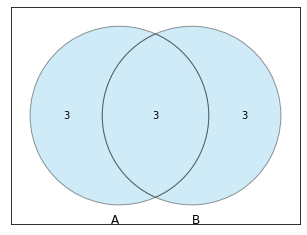

In [15]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(3, 3, 3))
# ベン図の色を変更する   
v.get_patch_by_id('10').set_color('skyblue')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('skyblue')
v.get_patch_by_id('11').set_edgecolor('black')
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')


# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

共通部分
$ A \cap B $

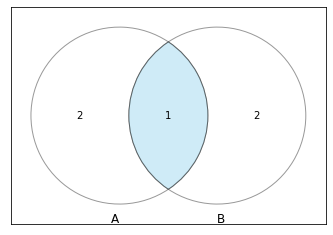

In [19]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 1))
# ベン図の色を変更する   
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('skyblue')
v.get_patch_by_id('11').set_edgecolor('black')
v.get_patch_by_id('01').set_color('white')
v.get_patch_by_id('01').set_edgecolor('black')


# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

絶対補　　：
$ U \setminus A  = \bar{A}  $

"補" =それ以外 

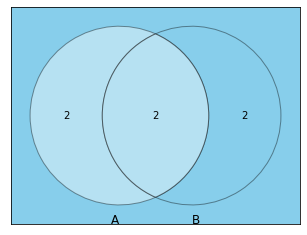

In [27]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('skyblue')
pyplot.show()

相対補　　：
$ B \setminus A    $

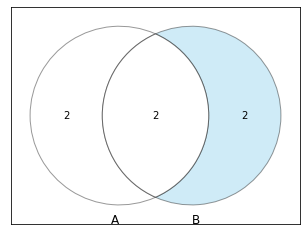

In [29]:
!pip3 install matplotlib-venn
from matplotlib_venn import venn2
from matplotlib import pyplot
v = venn2(subsets=(2, 2, 2))
# ベン図の色を変更する   
v.get_patch_by_id('01').set_color('skyblue')
v.get_patch_by_id('01').set_edgecolor('black')
v.get_patch_by_id('10').set_color('white')
v.get_patch_by_id('10').set_edgecolor('black')
v.get_patch_by_id('11').set_color('white')
v.get_patch_by_id('11').set_edgecolor('black')



# 背景色を変更する
pyplot.gca().set_axis_on()
pyplot.gca().set_facecolor('white')
pyplot.show()

$ \overline{A\cup B}$

#### 2.2 確率

#### &emsp;&emsp; 確率には以下の２種類がある。
#### &emsp;&emsp;&emsp;&emsp;頻度確率(客観確率)
#### &emsp;&emsp;&emsp;&emsp;&emsp; ・発生する頻度
##### &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; cf. くじ引き
#### &emsp;&emsp;&emsp;&emsp;ベイズ確率(主観確率)
#### &emsp;&emsp;&emsp;&emsp;&emsp; ・信念の度合い
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  cf. インフルエンザの可能性


#### 2.2.1 確率の定義